#### Univariate analysis: Frequency, Mean, Median, Mode, Variance, Standard Deviation, Skewness and Kurtosis.

In [1]:
import pandas as pd
import numpy as np 
import statistics as st

In [2]:
# Load the data
df = pd.read_csv("diabetes.csv")
print(df.shape)
print(df.info())

(768, 9)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [3]:
# mean
df.mean()

Pregnancies                   3.845052
Glucose                     120.894531
BloodPressure                69.105469
SkinThickness                20.536458
Insulin                      79.799479
BMI                          31.992578
DiabetesPedigreeFunction      0.471876
Age                          33.240885
Outcome                       0.348958
dtype: float64

In [4]:
# Median
df.median()

Pregnancies                   3.0000
Glucose                     117.0000
BloodPressure                72.0000
SkinThickness                23.0000
Insulin                      30.5000
BMI                          32.0000
DiabetesPedigreeFunction      0.3725
Age                          29.0000
Outcome                       0.0000
dtype: float64

In [5]:
# Mode
df.mode()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,1.0,99,70.0,0.0,0.0,32.0,0.254,22.0,0.0
1,NaN,100,NaN,NaN,NaN,NaN,0.258,NaN,NaN


In [6]:
# Standard division
df.std()

Pregnancies                   3.369578
Glucose                      31.972618
BloodPressure                19.355807
SkinThickness                15.952218
Insulin                     115.244002
BMI                           7.884160
DiabetesPedigreeFunction      0.331329
Age                          11.760232
Outcome                       0.476951
dtype: float64

In [7]:
# Variance
df.var()

Pregnancies                    11.354056
Glucose                      1022.248314
BloodPressure                 374.647271
SkinThickness                 254.473245
Insulin                     13281.180078
BMI                            62.159984
DiabetesPedigreeFunction        0.109779
Age                           138.303046
Outcome                         0.227483
dtype: float64

In [8]:
# Interquartile Range 
from scipy.stats import iqr
iqr(df['Age'])

17.0

In [9]:
# skewness 
print(df.skew())

Pregnancies                 0.901674
Glucose                     0.173754
BloodPressure              -1.843608
SkinThickness               0.109372
Insulin                     2.272251
BMI                        -0.428982
DiabetesPedigreeFunction    1.919911
Age                         1.129597
Outcome                     0.635017
dtype: float64


In [10]:
# Bivariante analysis: Linear and logistic regression modeling
import pandas as pd
df = pd.read_csv("diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [11]:
import matplotlib.pyplot as plt
import seaborn as sns 
sns.set(style='whitegrid', context='notebook') 
cols = ['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']

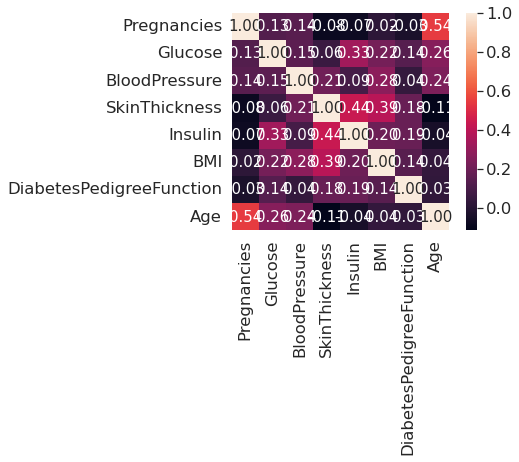

In [12]:
import numpy as np
cm = np.corrcoef(df[cols].values.T) 
sns.set(font_scale=1.5)
hm = sns.heatmap(cm,cbar=True,annot=True,square=True,fmt='.2f',annot_kws={'size': 15},yticklabels=cols,xticklabels=cols)
plt.show()

(1, 768)

/home/djoe/Documents/myprogramming/hackpython/dataScience/udemy_proj/env/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


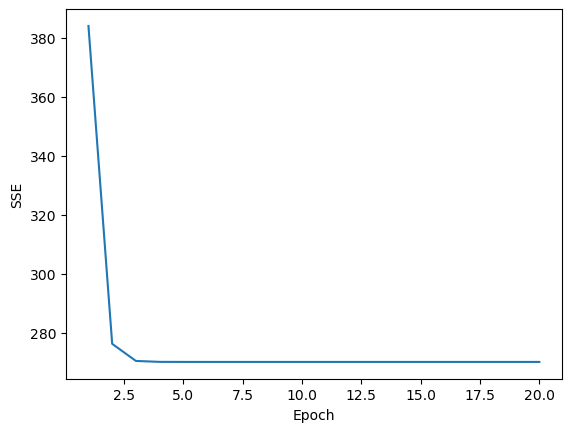

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
class LinearRegressionGD(object):
    def __init__(self, eta=0.001, n_iter=20):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1]) 
        self.cost_ = [] 
        for i in range(self.n_iter): 
            output = self.net_input(X)
            errors = (y[:,0] - output) 
            self.w_[1:] += self.eta * X.T.dot(errors) 
            self.w_[0] += self.eta * errors.sum() 
            cost = (errors**2).sum() / 2.0 
            self.cost_.append(cost) 
        return self 
    def net_input(self, X): 
        return np.dot(X, self.w_[1:]) + self.w_[0] 
    def predict(self, X): 
        return self.net_input(X)
df=pd.read_csv('diabetes.csv')
X = df[['Age']].values 
y = df[['Pregnancies']].values 
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
sc_y = StandardScaler() 
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
lr = LinearRegressionGD() 
lr.fit(X_std, y_std) 
plt.plot(range(1, lr.n_iter+1), lr.cost_) 
plt.ylabel('SSE') 
plt.xlabel('Epoch') 
plt.show()


In [21]:
y_std.shape

(768, 1)

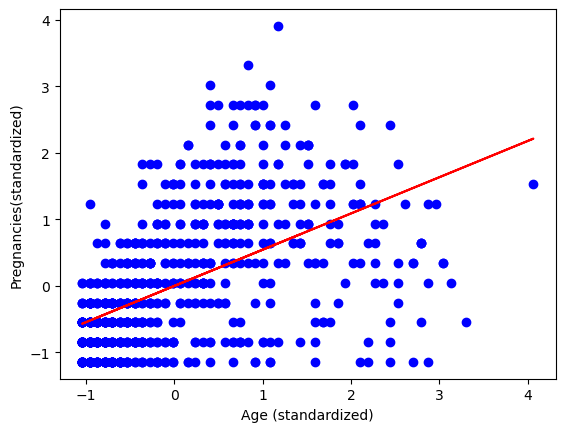

In [5]:
def lin_regplot(X, y, model): 
    plt.scatter(X, y, c='blue')
    plt.plot(X, model.predict(X), color='red') 
    return None 
lin_regplot(X_std, y_std, lr) 
plt.xlabel('Age (standardized)') 
plt.ylabel('Pregnancies(standardized)') 
plt.show()

In [8]:
X = df[['Age']].values 
y = df[['Pregnancies']].values 
from sklearn.preprocessing import StandardScaler 
sc_x = StandardScaler() 
sc_y = StandardScaler() 
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y)
age_std = sc_x.transform([[20]]) 
pregnancy_std = lr.predict(age_std) 
print("Pregnancy: %.3f" %sc_y.inverse_transform([pregnancy_std])) 
print('Slope: %.3f' % lr.w_[1])

Pregnancy: 1.780
Slope: 0.544


In [9]:
from sklearn.model_selection import train_test_split 
train_x, test_x, train_y, test_y = train_test_split(X,y,test_size=0.3,random_state=99)
train_x.shape, train_y.shape 
from sklearn.linear_model import LinearRegression 
le = LinearRegression() 
le.fit(train_x,train_y) 
y_pred = le.predict(test_x)
y_pred 
result = pd.DataFrame({'Actual': test_y[:,0], 'Predict' : y_pred[:,0]}) 
result

,Actual,Predict
0,0,8.233150
1,4,2.476792
2,4,2.632370
3,3,2.321215
4,3,2.632370
...,...,...
226,12,6.055069
227,3,6.677377
228,9,5.588337
229,8,9.166613


In [10]:
print ('coefficient', le.coef_)
print('intercept', le.intercept_)

coefficient [[0.15557723]]
intercept [-1.41263827]


In [17]:
import datacompy
df1=pd.read_csv("diap1.csv")
df2=pd.read_csv("diap2.csv")
compare = datacompy.Compare(df1,df2,join_columns='Age', abs_tol=0.0001,rel_tol=0,df1_name='olddiabetes',df2_name='newdiabetes') 
print(compare.report())

DataComPy Comparison
--------------------

DataFrame Summary
-----------------

     DataFrame  Columns  Rows
0  olddiabetes        9   384
1  newdiabetes        9   384

Column Summary
--------------

Number of columns in common: 9
Number of columns in olddiabetes but not in newdiabetes: 0
Number of columns in newdiabetes but not in olddiabetes: 0

Row Summary
-----------

Matched on: age
Any duplicates on match values: Yes
Absolute Tolerance: 0.0001
Relative Tolerance: 0
Number of rows in common: 319
Number of rows in olddiabetes but not in newdiabetes: 65
Number of rows in newdiabetes but not in olddiabetes: 65

Number of rows with some compared columns unequal: 319
Number of rows with all compared columns equal: 0

Column Comparison
-----------------

Number of columns compared with some values unequal: 8
Number of columns compared with all values equal: 1
Total number of values which compare unequal: 2,171

Columns with Unequal Values or Types
------------------------------------
